In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir(r'E:\MLData\nycDataSet')

In [3]:
os.listdir()

['data_dictionary_trip_records_yellow.pdf',
 'yellow_tripdata_2022-01.parquet',
 'yellow_tripdata_2022-06.parquet']

In [4]:
taxi=pd.read_parquet('yellow_tripdata_2022-06.parquet')

In [5]:
taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-06-01 00:25:41,2022-06-01 00:48:22,1.0,11.00,1.0,N,70,48,1,32.0,3.00,0.5,2.00,6.55,0.3,44.35,2.5,0.00
1,1,2022-06-01 00:44:40,2022-06-01 01:01:48,1.0,4.20,1.0,N,170,226,1,14.0,3.00,0.5,0.00,0.00,0.3,17.80,2.5,0.00
2,2,2022-06-01 00:23:07,2022-06-01 00:39:50,1.0,9.49,1.0,N,264,113,1,26.0,0.50,0.5,5.00,6.55,0.3,42.60,2.5,1.25
3,1,2022-06-01 00:25:53,2022-06-01 00:57:06,2.0,12.10,1.0,N,132,17,2,37.0,1.75,0.5,0.00,0.00,0.3,39.55,0.0,1.25
4,1,2022-06-01 00:23:58,2022-06-01 00:33:43,0.0,1.80,1.0,N,140,163,1,9.0,3.00,0.5,2.55,0.00,0.3,15.35,2.5,0.00


In [6]:
taxi.shape

(3558124, 19)

In [7]:
from sklearn.model_selection import train_test_split
taxi,_=train_test_split(taxi,test_size=.98,random_state=0)

In [8]:
taxi.shape

(71162, 19)

In [9]:
taxi.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,71162.0,1.715326,0.493790,1.00,1.00,2.00,2.00,6.00
passenger_count,68502.0,1.397915,0.958426,0.00,1.00,1.00,1.00,6.00
trip_distance,71162.0,5.139562,417.524139,0.00,1.14,1.94,3.63,111375.90
RatecodeID,68502.0,1.381887,5.379988,1.00,1.00,1.00,1.00,99.00
PULocationID,71162.0,164.479497,65.645951,1.00,132.00,162.00,234.00,265.00
DOLocationID,71162.0,162.143686,70.316140,1.00,113.00,162.00,234.00,265.00
payment_type,71162.0,1.182316,0.512962,0.00,1.00,1.00,1.00,4.00
fare_amount,71162.0,15.303329,47.533116,-500.00,7.00,10.50,16.50,6977.00
extra,71162.0,1.021993,1.257102,-4.50,0.00,0.50,2.50,8.25
mta_tax,71162.0,0.488028,0.096593,-0.50,0.50,0.50,0.50,2.78


Target Variable is total_amount
since total_amount and fare_amount are highly correlated therefore fare_amount has to be dropped

### EDA 

In [10]:
taxi['VendorID'].value_counts()

2    50189
1    20830
6      143
Name: VendorID, dtype: int64

In [11]:
def univariate_cat(data,x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    
    f1=pd.DataFrame(data[x].value_counts(dropna=False))
    f1.rename(columns={'ed':'Count'},inplace=True)
    
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:'Percentage'},inplace=True)
    f2['Percentage']=(f2['Percentage']*100).round(2).astype(str)+"%"
    ff=pd.concat([f1,f2],axis=1)    
    
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_cnt}\n")
    print(f"Unique categories :\n{unique_cat}")
    print("value counts and %n ",ff)
#     plt.figure(figsize=(10,8))
#     sns.countplot(data=data,x=x)
#     plt.show()

In [12]:
univariate_cat(data=taxi,x='VendorID')

Total missing values : 0

Total count of unique categories: 3

Unique categories :
[2, 1, 6]
value counts and %n     VendorID Percentage
2     50189     70.53%
1     20830     29.27%
6       143       0.2%


In [13]:
taxi['VendorID']=taxi['VendorID'].replace([6,5],'Others')

In [14]:
taxi['VendorID'].value_counts()

2         50189
1         20830
Others      143
Name: VendorID, dtype: int64

In [15]:
taxi.dtypes[taxi.dtypes=='object']

VendorID              object
store_and_fwd_flag    object
dtype: object

In [16]:
univariate_cat(data=taxi, x='store_and_fwd_flag')

Total missing values : 2660

Total count of unique categories: 2

Unique categories :
['N', None, 'Y']
value counts and %n        store_and_fwd_flag Percentage
N                  67674     98.79%
None                2660        NaN
Y                    828      1.21%


In [17]:
taxi['store_and_fwd_flag']=taxi['store_and_fwd_flag'].replace(np.nan,'other')

In [18]:
taxi['store_and_fwd_flag'].isnull().sum()

0

In [19]:
taxi['RatecodeID'].value_counts()

1.0     64553
2.0      2826
5.0       612
3.0       217
99.0      206
4.0        88
Name: RatecodeID, dtype: int64

In [20]:
# 1= Standard rate
# 2=JFK
# 3=Newark
# 4=Nassau or Westchester
# 5=Negotiated fare
# 6=Group ride

In [21]:
taxi['RatecodeID']=taxi['RatecodeID'].map({1:'Standard_rate',
                                          2:'JFK',
                                          3:'Newark',
                                          4:'Nassau_or_Westchester',
                                          5:'Negotiated_fare',
                                          6:'Group_ride',
                                          99:'others'})

In [22]:
univariate_cat(data=taxi,x='RatecodeID')

Total missing values : 2660

Total count of unique categories: 6

Unique categories :
['Standard_rate', nan, 'Negotiated_fare', 'JFK', 'Newark', 'Nassau_or_Westchester', 'others']
value counts and %n                         RatecodeID Percentage
Standard_rate               64553     94.24%
JFK                          2826      4.13%
NaN                          2660        NaN
Negotiated_fare               612      0.89%
Newark                        217      0.32%
others                        206       0.3%
Nassau_or_Westchester          88      0.13%


In [23]:
taxi['RatecodeID']=taxi['RatecodeID'].replace(np.nan,'other')

In [24]:
taxi['RatecodeID'].value_counts(dropna=False)

Standard_rate            64553
JFK                       2826
other                     2660
Negotiated_fare            612
Newark                     217
others                     206
Nassau_or_Westchester       88
Name: RatecodeID, dtype: int64

In [25]:
taxi['payment_type'].value_counts()

1    53921
2    13873
0     2660
3      363
4      345
Name: payment_type, dtype: int64

In [26]:
univariate_cat(data=taxi,x='payment_type')

Total missing values : 0

Total count of unique categories: 5

Unique categories :
[1, 2, 0, 4, 3]
value counts and %n     payment_type Percentage
1         53921     75.77%
2         13873     19.49%
0          2660      3.74%
3           363      0.51%
4           345      0.48%


In [27]:
taxi['payment_type']=taxi['payment_type'].map({1:'Credit_card',
                                              2:'Cash',
                                              3:'No_charge',
                                              4:'Dispute',
                                              0:'Unkown'
                                              })

In [28]:
# 1= Credit card
# 2= Cash
# 3= No charge
# 4= Dispute
# 5= Unknown
# 6= Voided trip

In [29]:
taxi['payment_type'].value_counts()

Credit_card    53921
Cash           13873
Unkown          2660
No_charge        363
Dispute          345
Name: payment_type, dtype: int64

#### Numerical 

In [30]:
taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
11293,2,2022-06-01 08:48:20,2022-06-01 09:00:30,1.0,1.75,Standard_rate,N,143,48,Credit_card,9.5,0.0,0.5,2.00,0.0,0.3,14.80,2.5,0.0
3241804,2,2022-06-29 12:30:59,2022-06-29 13:20:10,1.0,9.16,Standard_rate,N,143,95,Cash,36.0,0.0,0.5,0.00,0.0,0.3,39.30,2.5,0.0
2122208,1,2022-06-19 01:03:50,2022-06-19 01:27:44,1.0,5.00,Standard_rate,N,249,80,Credit_card,20.0,3.0,0.5,2.00,0.0,0.3,25.80,2.5,0.0
645015,2,2022-06-06 17:16:57,2022-06-06 17:35:51,1.0,3.02,Standard_rate,N,230,113,Credit_card,13.5,1.0,0.5,1.78,0.0,0.3,19.58,2.5,0.0
1752107,2,2022-06-15 22:09:34,2022-06-15 22:28:03,1.0,3.53,Standard_rate,N,90,237,Credit_card,14.5,0.5,0.5,2.74,0.0,0.3,21.04,2.5,0.0


In [31]:
def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75), 2)
    skew=round( data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=data, y=data[x])
    plt.show()
    return myvalue

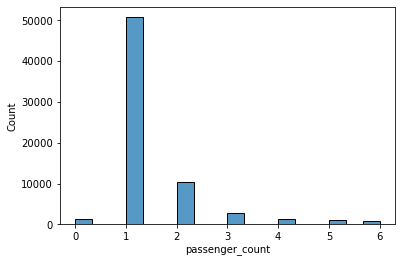

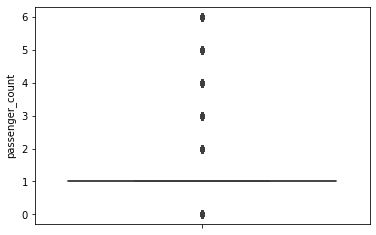

{'missing': 2660,
 'min': 0.0,
 'max': 6.0,
 'mean': 1.4,
 'var': 0.92,
 'std': 0.96,
 'range': 6.0,
 'q1': 1.0,
 'q2': 1.0,
 'q3': 1.0,
 'skewness': 2.74,
 'kurtosis': 8.32}

In [32]:
univariate_num(data=taxi,x='passenger_count')

In [1]:
# univariate_num(data=taxi,x='trip_distance')

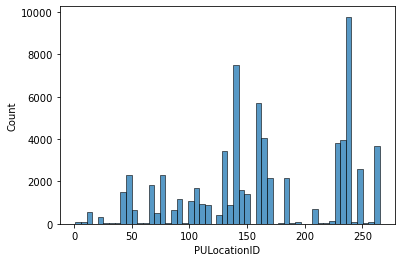

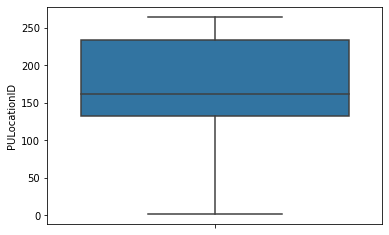

{'missing': 0,
 'min': 1,
 'max': 265,
 'mean': 164.48,
 'var': 4309.39,
 'std': 65.65,
 'range': 264,
 'q1': 132.0,
 'q2': 162.0,
 'q3': 234.0,
 'skewness': -0.26,
 'kurtosis': -0.89}

In [33]:
univariate_num(data=taxi,x='PULocationID')

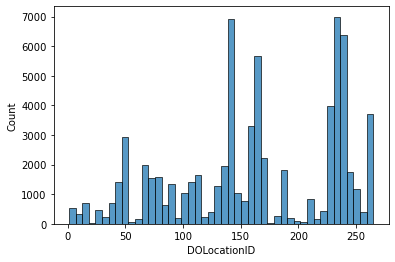

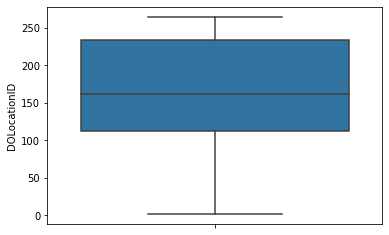

{'missing': 0,
 'min': 1,
 'max': 265,
 'mean': 162.14,
 'var': 4944.36,
 'std': 70.32,
 'range': 264,
 'q1': 113.0,
 'q2': 162.0,
 'q3': 234.0,
 'skewness': -0.34,
 'kurtosis': -0.94}

In [34]:
univariate_num(data=taxi,x='DOLocationID')

In [36]:
taxi.drop(columns=['PULocationID','DOLocationID'],inplace=True)

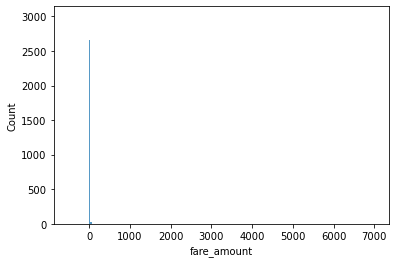

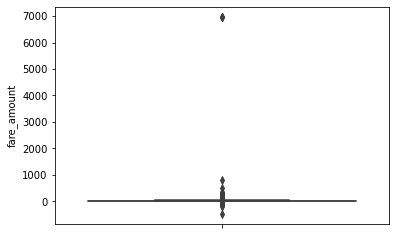

{'missing': 0,
 'min': -500.0,
 'max': 6977.0,
 'mean': 15.3,
 'var': 2259.4,
 'std': 47.53,
 'range': 7477.0,
 'q1': 7.0,
 'q2': 10.5,
 'q3': 16.5,
 'skewness': 132.37,
 'kurtosis': 19353.71}

In [37]:
univariate_num(data=taxi,x='fare_amount')


upper=16.5+1.5*(16-q1)

In [38]:
taxi[taxi['fare_amount']<0].shape

(474, 17)

In [39]:
taxi[taxi['fare_amount']<2.5].shape

(525, 17)

In [40]:
taxi.shape

(71162, 17)

In [41]:
(71000-5000)/71000

0.9295774647887324

In [42]:
taxi1=taxi[taxi['fare_amount']>=2.5]

In [43]:
taxi1.shape

(70637, 17)

<AxesSubplot:ylabel='fare_amount'>

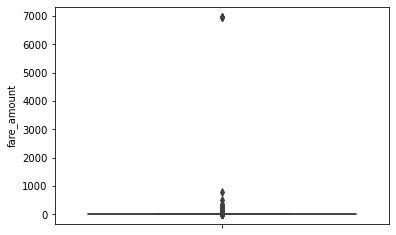

In [44]:
sns.boxplot(data=taxi1,y='fare_amount')

In [ ]:
taxi1[taxi1['fare_amount']>30.75].shape

In [47]:
taxi1[taxi1['fare_amount']].describe(percentiles=[.75,.8,.95,.96,.97,.98,.99])

SyntaxError: unexpected EOF while parsing (4020490657.py, line 1)

In [48]:
taxi1.dtypes[taxi1.dtypes!='object'].index

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee'],
      dtype='object')

type column name here which are not object from the above cell result

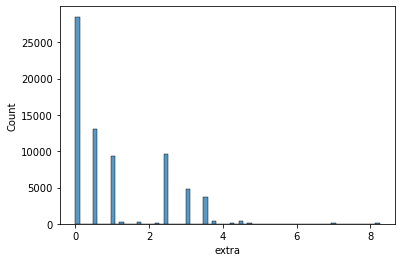

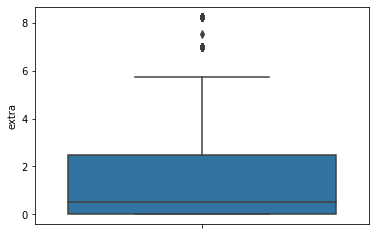

{'missing': 0,
 'min': 0.0,
 'max': 8.25,
 'mean': 1.03,
 'var': 1.58,
 'std': 1.26,
 'range': 8.25,
 'q1': 0.0,
 'q2': 0.5,
 'q3': 2.5,
 'skewness': 1.14,
 'kurtosis': 0.75}

In [49]:
univariate_num(data=taxi1,x='extra')

In [50]:
taxi1[taxi1['extra']==0].shape

(28530, 17)

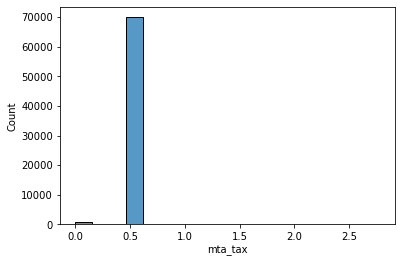

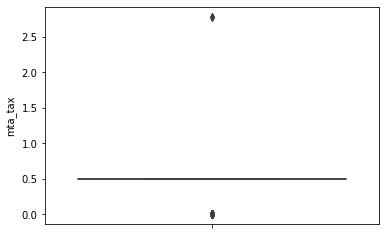

{'missing': 0,
 'min': 0.0,
 'max': 2.78,
 'mean': 0.49,
 'var': 0.0,
 'std': 0.05,
 'range': 2.78,
 'q1': 0.5,
 'q2': 0.5,
 'q3': 0.5,
 'skewness': -6.5,
 'kurtosis': 188.41}

In [51]:
univariate_num(data=taxi1,x='mta_tax')

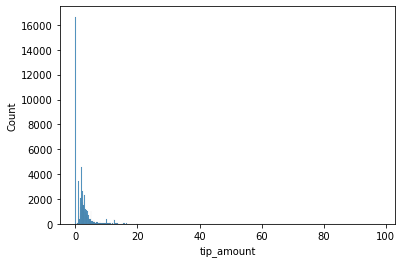

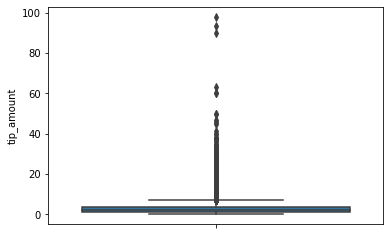

{'missing': 0,
 'min': 0.0,
 'max': 98.0,
 'mean': 2.81,
 'var': 10.4,
 'std': 3.22,
 'range': 98.0,
 'q1': 1.0,
 'q2': 2.2,
 'q3': 3.45,
 'skewness': 3.82,
 'kurtosis': 44.22}

In [52]:
univariate_num(data=taxi1,x='tip_amount')

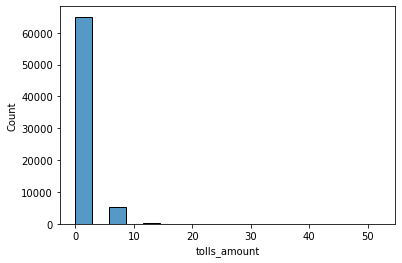

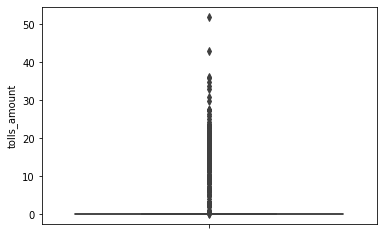

{'missing': 0,
 'min': 0.0,
 'max': 52.0,
 'mean': 0.57,
 'var': 4.33,
 'std': 2.08,
 'range': 52.0,
 'q1': 0.0,
 'q2': 0.0,
 'q3': 0.0,
 'skewness': 4.8,
 'kurtosis': 36.86}

In [53]:
univariate_num(data=taxi1,x='tolls_amount')

<AxesSubplot:xlabel='tolls_amount'>

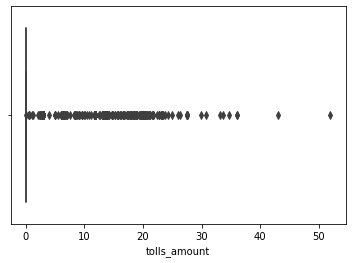

In [54]:
sns.boxplot(data=taxi1,x='tolls_amount')

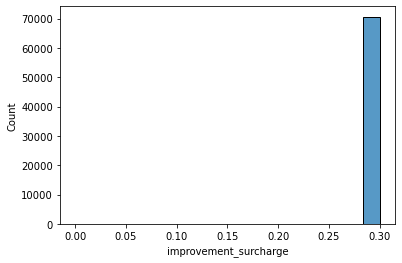

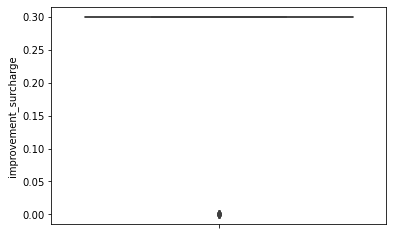

{'missing': 0,
 'min': 0.0,
 'max': 0.3,
 'mean': 0.3,
 'var': 0.0,
 'std': 0.0,
 'range': 0.3,
 'q1': 0.3,
 'q2': 0.3,
 'q3': 0.3,
 'skewness': -76.71,
 'kurtosis': 5881.83}

In [55]:
univariate_num(data=taxi1,x='improvement_surcharge')

In [56]:
taxi1[taxi1['improvement_surcharge']==0].shape

(12, 17)

In [58]:
taxi1.drop(columns=['improvement_surcharge'],inplace=True)

C:\Users\sony\AppData\Local\Temp\ipykernel_5868\4218148775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi1.drop(columns=['improvement_surcharge'],inplace=True)


In [59]:
taxi1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,airport_fee
11293,2,2022-06-01 08:48:20,2022-06-01 09:00:30,1.0,1.75,Standard_rate,N,Credit_card,9.5,0.0,0.5,2.00,0.0,14.80,2.5,0.0
3241804,2,2022-06-29 12:30:59,2022-06-29 13:20:10,1.0,9.16,Standard_rate,N,Cash,36.0,0.0,0.5,0.00,0.0,39.30,2.5,0.0
2122208,1,2022-06-19 01:03:50,2022-06-19 01:27:44,1.0,5.00,Standard_rate,N,Credit_card,20.0,3.0,0.5,2.00,0.0,25.80,2.5,0.0
645015,2,2022-06-06 17:16:57,2022-06-06 17:35:51,1.0,3.02,Standard_rate,N,Credit_card,13.5,1.0,0.5,1.78,0.0,19.58,2.5,0.0
1752107,2,2022-06-15 22:09:34,2022-06-15 22:28:03,1.0,3.53,Standard_rate,N,Credit_card,14.5,0.5,0.5,2.74,0.0,21.04,2.5,0.0


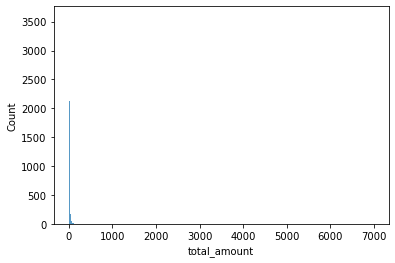

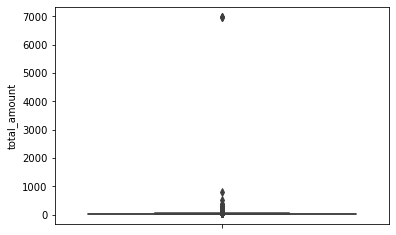

{'missing': 0,
 'min': 3.3,
 'max': 6981.3,
 'mean': 22.45,
 'var': 2374.85,
 'std': 48.73,
 'range': 6978.0,
 'q1': 12.36,
 'q2': 16.3,
 'q3': 23.3,
 'skewness': 123.63,
 'kurtosis': 17609.46}

In [60]:
univariate_num(data=taxi1,x='total_amount')

<AxesSubplot:ylabel='total_amount'>

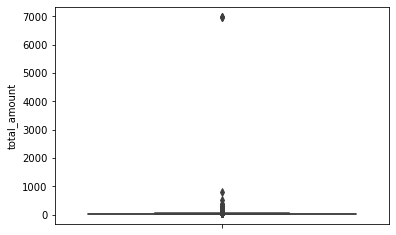

In [61]:
sns.boxplot(data=taxi1,y='total_amount')

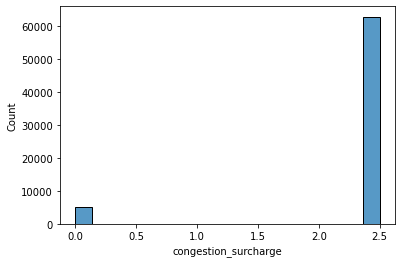

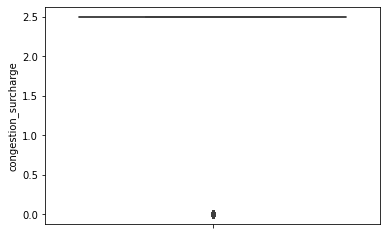

{'missing': 2658,
 'min': 0.0,
 'max': 2.5,
 'mean': 2.31,
 'var': 0.44,
 'std': 0.67,
 'range': 2.5,
 'q1': 2.5,
 'q2': 2.5,
 'q3': 2.5,
 'skewness': -3.17,
 'kurtosis': 8.08}

In [62]:
univariate_num(data=taxi1,x='congestion_surcharge')

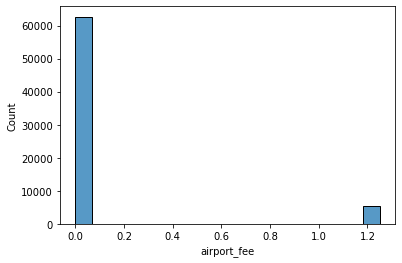

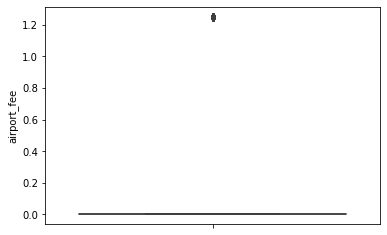

{'missing': 2658,
 'min': 0.0,
 'max': 1.25,
 'mean': 0.1,
 'var': 0.11,
 'std': 0.34,
 'range': 1.25,
 'q1': 0.0,
 'q2': 0.0,
 'q3': 0.0,
 'skewness': 3.15,
 'kurtosis': 7.92}

In [63]:
univariate_num(data=taxi1,x='airport_fee')

<AxesSubplot:ylabel='airport_fee'>

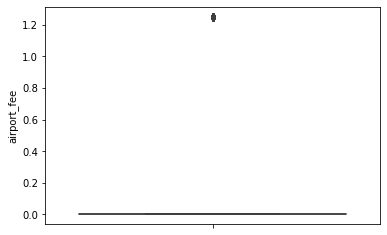

In [64]:
sns.boxplot(data=taxi1,y='airport_fee')

In [65]:
taxi1[taxi1['airport_fee']==0].shape

(62683, 16)

### Feature Engineering

In [66]:
taxi1.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [67]:
taxi1['tpep_pickup_datetime'].min()

Timestamp('2002-10-21 12:53:50')

In [68]:
taxi1['tpep_pickup_datetime'].max()

Timestamp('2022-07-01 00:36:12')

###### Date: we can extract month,weekend/weekday,public_holiday,time fo pickup (early morning,morning,afternoon,evening,night,late nigth
##### two date:duration                                                       

In [69]:
taxi1['month']=taxi1['tpep_pickup_datetime'].dt.month
taxi1['year']=taxi1['tpep_pickup_datetime'].dt.year
taxi1['week_of_day']=taxi1['tpep_pickup_datetime'].dt.dayofweek
taxi1['day']=taxi1['tpep_pickup_datetime'].dt.day
taxi1['hours']=taxi1['tpep_pickup_datetime'].dt.hour

C:\Users\sony\AppData\Local\Temp\ipykernel_5868\941063554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi1['month']=taxi1['tpep_pickup_datetime'].dt.month
C:\Users\sony\AppData\Local\Temp\ipykernel_5868\941063554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi1['year']=taxi1['tpep_pickup_datetime'].dt.year
C:\Users\sony\AppData\Local\Temp\ipykernel_5868\941063554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [70]:
taxi1['month'].value_counts()

6     70627
10        7
7         2
5         1
Name: month, dtype: int64

In [71]:
taxi1=taxi1[taxi1['month']==6]
taxi1=taxi1[taxi1['year']==2022]

In [72]:
taxi1['year'].value_counts()

2022    70627
Name: year, dtype: int64

In [73]:
taxi1['week_of_day'].value_counts()

3    12775
2    12363
4    10241
1     9482
5     9401
0     8501
6     7864
Name: week_of_day, dtype: int64

In [74]:
taxi1['isweekend']=np.where(taxi1['week_of_day'].isin([5,6]),1,0)

In [75]:
def day_cut(x):
    if x<=10:
        return 'starting_of_month'
    elif x>10 and x<=20:
        return 'mid_of_month'
    else:
        return 'End_of_month'
taxi1['day_cat']=taxi1['day'].apply(lambda a:day_cut(a))

In [76]:
taxi1['day_cat'].value_counts()

starting_of_month    24393
mid_of_month         23261
End_of_month         22973
Name: day_cat, dtype: int64

In [77]:
taxi1['hours'].value_counts()

18    5002
17    4698
19    4606
15    4322
14    4309
16    4248
13    3966
12    3853
21    3792
20    3765
11    3677
22    3587
10    3333
9     3038
23    2867
8     2746
0     2058
7     2041
1     1313
6     1076
2      880
3      573
5      489
4      388
Name: hours, dtype: int64

early morning:4-8
morning:8-12
afternoon:12-16
even:16-20
night:20-24
mid-night:0-4

In [78]:
taxi1['hours'].dtypes

dtype('int64')

In [79]:
def hour_category(x):
    if x>=4 and x<8:
        return "early morning"
    elif x>=8 and x<12:
        return 'morning'
    elif x>=12 and x<16:
        return 'afternoon'
    elif x>=16 and x<20:
        return 'evening'
    elif x>=20 and x<0:
        return 'night'
    elif x>=0 and x<4:
        return 'midNight'
    else:
        return 'Unknown'
taxi1['hours_cat']=taxi1['hours'].apply(lambda a:hour_category(a))

In [80]:
taxi1['hours_cat'].value_counts()

evening          18554
afternoon        16450
Unknown          14011
morning          12794
midNight          4824
early morning     3994
Name: hours_cat, dtype: int64

In [81]:
taxi1['duration']=(taxi1['tpep_dropoff_datetime']-taxi1['tpep_pickup_datetime'])*24

In [82]:
taxi1['duration'].min()

Timedelta('-1 days +23:39:36')

In [83]:
taxi1['duration']=((taxi1['tpep_dropoff_datetime']-taxi1['tpep_pickup_datetime'])/pd.Timedelta(minutes=1))

In [84]:
taxi1['duration'].min()

-0.85

In [85]:
taxi1['duration'].max()

1439.4166666666667

In [86]:
taxi1['duration'].value_counts()

12.000000    101
9.000000     100
14.000000     90
16.000000     85
13.000000     85
            ... 
62.100000      1
80.016667      1
75.400000      1
65.566667      1
53.333333      1
Name: duration, Length: 4559, dtype: int64

In [87]:
def time_category(x):
    if x<15:
        return 'duration_bt_0_15m'
    elif x>=15 and x<30  :
        return 'duration_bt_0_30m'
    elif x>=30 and x<60:
        return 'duration_bt_30_60m'
    elif x>=60 and x<120:
        return 'duration_bt_60_120m'
    else:
        return 'duration_morethan_120'

In [88]:
taxi1['time_category']=taxi1['duration'].apply(lambda a:time_category(a))

In [89]:
taxi1['time_category'].value_counts()

duration_bt_0_15m        41741
duration_bt_0_30m        20678
duration_bt_30_60m        6757
duration_bt_60_120m       1350
duration_morethan_120      101
Name: time_category, dtype: int64

<AxesSubplot:>

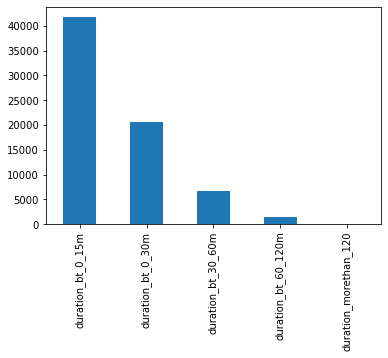

In [90]:
taxi1['time_category'].value_counts().plot(kind='bar')

In [91]:
taxi1['airport_pick_up']=np.where(taxi1['airport_fee']==0,0,1)

In [92]:
taxi1['airport_pick_up'].value_counts()

0    62675
1     7952
Name: airport_pick_up, dtype: int64

In [93]:
taxi1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,...,year,week_of_day,day,hours,isweekend,day_cat,hours_cat,duration,time_category,airport_pick_up
11293,2,2022-06-01 08:48:20,2022-06-01 09:00:30,1.0,1.75,Standard_rate,N,Credit_card,9.5,0.0,...,2022,2,1,8,0,starting_of_month,morning,12.166667,duration_bt_0_15m,0
3241804,2,2022-06-29 12:30:59,2022-06-29 13:20:10,1.0,9.16,Standard_rate,N,Cash,36.0,0.0,...,2022,2,29,12,0,End_of_month,afternoon,49.183333,duration_bt_30_60m,0
2122208,1,2022-06-19 01:03:50,2022-06-19 01:27:44,1.0,5.00,Standard_rate,N,Credit_card,20.0,3.0,...,2022,6,19,1,1,mid_of_month,midNight,23.900000,duration_bt_0_30m,0
645015,2,2022-06-06 17:16:57,2022-06-06 17:35:51,1.0,3.02,Standard_rate,N,Credit_card,13.5,1.0,...,2022,0,6,17,0,starting_of_month,evening,18.900000,duration_bt_0_30m,0
1752107,2,2022-06-15 22:09:34,2022-06-15 22:28:03,1.0,3.53,Standard_rate,N,Credit_card,14.5,0.5,...,2022,2,15,22,0,mid_of_month,Unknown,18.483333,duration_bt_0_30m,0


In [94]:
taxi.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [95]:
taxi1['total_amount'].value_counts()

10.80     1028
11.80      978
12.36      969
10.30      965
12.80      963
          ... 
75.86        1
205.55       1
24.22        1
42.19        1
85.10        1
Name: total_amount, Length: 3937, dtype: int64

In [96]:
def amount_category(x):
    if x>=10 and x<15:
        return '[10,15)'
    elif x>=15 and x<20:
        return '[15,20)'
    elif x>=20 and x<25:
        return '[20,25)'
    elif x>=25 and x<30:
        return '[25,30)'
    elif x>=30 and x<35:
        return '[30,35)'
    elif x>=35 and x<40:
        return '[35,40)'
    elif x>=40 and x<45:
        return '[40,45)'
    elif x>=45 and x<50:
        return '[45,50)'
    else:
        return '50+'

In [97]:
taxi1['amount_cat']=taxi1['total_amount'].apply(lambda a:amount_category(a))

<AxesSubplot:>

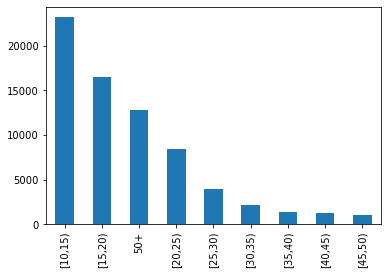

In [98]:
taxi1['amount_cat'].value_counts().plot(kind='bar')

### Bivariate analysis(by own )

In [138]:
pd.crosstab(taxi['RatecodeID'],taxi['payment_type'])

payment_type,Cash,Credit_card,Dispute,No_charge,Unkown
RatecodeID,,,,,
JFK,563,2228,18,17,0
Nassau_or_Westchester,20,67,1,0,0
Negotiated_fare,83,513,7,9,0
Newark,41,170,2,4,0
Standard_rate,13166,50737,317,333,0
other,0,0,0,0,2660
others,0,206,0,0,0


In [139]:
pd.crosstab(taxi['RatecodeID'],taxi['store_and_fwd_flag'])

store_and_fwd_flag,N,Y,other
RatecodeID,,,
JFK,2800,26,0
Nassau_or_Westchester,88,0,0
Negotiated_fare,605,7,0
Newark,216,1,0
Standard_rate,63759,794,0
other,0,0,2660
others,206,0,0


#### cat-num

<AxesSubplot:xlabel='RatecodeID'>

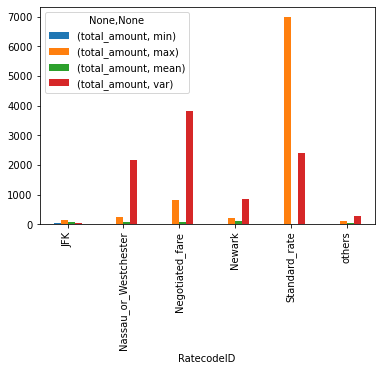

In [141]:
taxi2.groupby(['RatecodeID']).agg({'total_amount':['min','max','mean','var']}).plot(kind='bar')

In [142]:
taxi2.groupby(["RatecodeID"]).agg({"trip_distance": [np.min, np.max, np.mean, "count"]})

trip_distance                          
                               amin    amax       mean  count
RatecodeID                                                   
JFK                             0.0   43.02  17.400688   2789
Nassau_or_Westchester           1.2   75.27  21.332209     86
Negotiated_fare                 0.0  148.09   5.338596    577
Newark                          0.0   38.74  17.718224    214
Standard_rate                   0.0  410.17   2.845812  64097
others                          0.0   25.30   5.060194    206

In [ ]:
taxi2.groupby(["RatecodeID"]).agg({"trip_distance": [np.min, np.max, np.mean, "count"]})

In [143]:
taxi2['payment_type'].value_counts()

Credit_card    53908
Cash           13737
No_charge        236
Dispute           88
Name: payment_type, dtype: int64

In [144]:
taxi2.groupby(["payment_type"]).agg({"trip_distance": [np.min, np.max, np.mean, "count"]})

trip_distance                         
                      amin    amax      mean  count
payment_type                                       
Cash                   0.0  410.17  3.447887  13737
Credit_card            0.0  148.09  3.568497  53908
Dispute                0.0   39.90  3.981818     88
No_charge              0.0   31.80  2.555085    236

In [145]:
taxi2.groupby(["payment_type"]).agg({"total_amount": [np.min, np.max, np.mean, "count"]})

total_amount                          
                     amin    amax       mean  count
payment_type                                       
Cash                  3.3  6981.3  19.937416  13737
Credit_card           3.3   495.3  22.767365  53908
Dispute               3.3    80.3  19.007386     88
No_charge             3.3   115.6  16.638771    236

#### num-num

In [147]:
taxi2[["total_amount", "trip_distance"]].corr()

,total_amount,trip_distance
total_amount,1.000000,0.298625
trip_distance,0.298625,1.000000


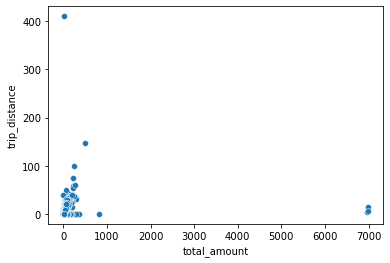

In [149]:
sns.scatterplot( data=taxi2,x=taxi2["total_amount"],y=taxi2["trip_distance"])
plt.show()

In [35]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71162 entries, 11293 to 305711
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               71162 non-null  object        
 1   tpep_pickup_datetime   71162 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  71162 non-null  datetime64[ns]
 3   passenger_count        68502 non-null  float64       
 4   trip_distance          71162 non-null  float64       
 5   RatecodeID             71162 non-null  object        
 6   store_and_fwd_flag     71162 non-null  object        
 7   PULocationID           71162 non-null  int64         
 8   DOLocationID           71162 non-null  int64         
 9   payment_type           71162 non-null  object        
 10  fare_amount            71162 non-null  float64       
 11  extra                  71162 non-null  float64       
 12  mta_tax                71162 non-null  float64       
 

### Missing Value Treatment

In [100]:
taxi1.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          2658
trip_distance               0
RatecodeID                  0
store_and_fwd_flag          0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
total_amount                0
congestion_surcharge     2658
airport_fee              2658
month                       0
year                        0
week_of_day                 0
day                         0
hours                       0
isweekend                   0
day_cat                     0
hours_cat                   0
duration                    0
time_category               0
airport_pick_up             0
amount_cat                  0
dtype: int64

In [105]:
temp0=taxi1[taxi1['passenger_count'].isnull()]

In [106]:
temp0.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          2658
trip_distance               0
RatecodeID                  0
store_and_fwd_flag          0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
total_amount                0
congestion_surcharge     2658
airport_fee              2658
month                       0
year                        0
week_of_day                 0
day                         0
hours                       0
isweekend                   0
day_cat                     0
hours_cat                   0
duration                    0
time_category               0
airport_pick_up             0
amount_cat                  0
dtype: int64

In [107]:
taxi2=taxi1.dropna()

In [108]:
taxi1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70627 entries, 11293 to 305711
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               70627 non-null  object        
 1   tpep_pickup_datetime   70627 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  70627 non-null  datetime64[ns]
 3   passenger_count        67969 non-null  float64       
 4   trip_distance          70627 non-null  float64       
 5   RatecodeID             70627 non-null  object        
 6   store_and_fwd_flag     70627 non-null  object        
 7   payment_type           70627 non-null  object        
 8   fare_amount            70627 non-null  float64       
 9   extra                  70627 non-null  float64       
 10  mta_tax                70627 non-null  float64       
 11  tip_amount             70627 non-null  float64       
 12  tolls_amount           70627 non-null  float64       
 

In [109]:
taxi2.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
total_amount             0
congestion_surcharge     0
airport_fee              0
month                    0
year                     0
week_of_day              0
day                      0
hours                    0
isweekend                0
day_cat                  0
hours_cat                0
duration                 0
time_category            0
airport_pick_up          0
amount_cat               0
dtype: int64

#### Outliers

In [110]:
taxi2.describe(percentiles=[.01,.02,.03,.05,.25,.7,.8,.9,.98,.99]).T

,count,mean,std,min,1%,2%,3%,5%,25%,50%,70%,80%,90%,98%,99%,max
passenger_count,67969.0,1.398682,0.959825,0.0,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,2.000000,2.00,5.000000,6.000,6.000000
trip_distance,67969.0,3.541137,4.782556,0.0,0.000000,0.250000,0.4,0.510000,1.130000,1.900000,3.030000,4.360000,9.02,18.680000,20.260,410.170000
fare_amount,67969.0,15.271000,48.398615,2.5,3.500000,4.000000,4.0,4.500000,7.000000,10.500000,14.500000,19.000000,31.20,52.000000,62.500,6977.000000
extra,67969.0,1.069702,1.263564,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.500000,1.000000,2.500000,3.00,3.500000,3.750,8.250000
mta_tax,67969.0,0.494910,0.052014,0.0,0.000000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.50,0.500000,0.500,2.780000
tip_amount,67969.0,2.765738,3.209275,0.0,0.000000,0.000000,0.0,0.000000,1.000000,2.160000,3.060000,3.850000,5.66,12.620000,15.000,98.000000
tolls_amount,67969.0,0.562375,2.062867,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,6.550000,6.550,52.000000
total_amount,67969.0,22.169266,49.525152,3.3,6.800000,7.800000,8.3,8.800000,12.350000,15.960000,20.800000,25.800000,43.35,75.720000,81.120,6981.300000
congestion_surcharge,67969.0,2.307670,0.666214,0.0,0.000000,0.000000,0.0,0.000000,2.500000,2.500000,2.500000,2.500000,2.50,2.500000,2.500,2.500000
airport_fee,67969.0,0.097361,0.334997,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.250000,1.250,1.250000


In [111]:
taxi2.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount', 'congestion_surcharge', 'airport_fee',
       'month', 'year', 'week_of_day', 'day', 'hours', 'isweekend', 'day_cat',
       'hours_cat', 'duration', 'time_category', 'airport_pick_up',
       'amount_cat'],
      dtype='object')

In [112]:
taxi2.drop(columns=['tpep_pickup_datetime','tpep_dropoff_datetime'],inplace=True)

C:\Users\sony\AppData\Local\Temp\ipykernel_5868\175399171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi2.drop(columns=['tpep_pickup_datetime','tpep_dropoff_datetime'],inplace=True)


In [113]:
taxi2.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,...,week_of_day,day,hours,isweekend,day_cat,hours_cat,duration,time_category,airport_pick_up,amount_cat
11293,2,1.0,1.75,Standard_rate,N,Credit_card,9.5,0.0,0.5,2.00,...,2,1,8,0,starting_of_month,morning,12.166667,duration_bt_0_15m,0,"[10,15)"
3241804,2,1.0,9.16,Standard_rate,N,Cash,36.0,0.0,0.5,0.00,...,2,29,12,0,End_of_month,afternoon,49.183333,duration_bt_30_60m,0,"[35,40)"
2122208,1,1.0,5.00,Standard_rate,N,Credit_card,20.0,3.0,0.5,2.00,...,6,19,1,1,mid_of_month,midNight,23.900000,duration_bt_0_30m,0,"[25,30)"
645015,2,1.0,3.02,Standard_rate,N,Credit_card,13.5,1.0,0.5,1.78,...,0,6,17,0,starting_of_month,evening,18.900000,duration_bt_0_30m,0,"[15,20)"
1752107,2,1.0,3.53,Standard_rate,N,Credit_card,14.5,0.5,0.5,2.74,...,2,15,22,0,mid_of_month,Unknown,18.483333,duration_bt_0_30m,0,"[20,25)"


In [114]:
obj_var=taxi2.dtypes[taxi2.dtypes=='object'].index
num_var=taxi2.dtypes[taxi2.dtypes!='object'].index

In [115]:
taxi_num=taxi2[num_var]
taxi_obj=taxi2[obj_var]

In [116]:
def outliers(x):
    x=x.clip(upper=x.quantile(.99))
#     x=x.clip(lower=x.quantile(.01))
    return x

In [117]:
taxi_num=taxi_num.apply(lambda x:outliers(x))

In [118]:
taxi_num.describe(percentiles=[.01,.02,.03,.05,.25,.7,.8,.9,.98,.99]).T

,count,mean,std,min,1%,2%,3%,5%,25%,50%,70%,80%,90%,98%,99%,max
passenger_count,67969.0,1.398682,0.959825,0.0,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,2.000000,2.00,5.000000,6.000000,6.000
trip_distance,67969.0,3.496722,4.290757,0.0,0.000000,0.250000,0.4,0.510000,1.130000,1.900000,3.030000,4.360000,9.02,18.680000,20.260000,20.260
fare_amount,67969.0,14.728502,12.486495,2.5,3.500000,4.000000,4.0,4.500000,7.000000,10.500000,14.500000,19.000000,31.20,52.000000,62.500000,62.500
extra,67969.0,1.056464,1.221008,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.500000,1.000000,2.500000,3.00,3.500000,3.750000,3.750
mta_tax,67969.0,0.494843,0.050516,0.0,0.000000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.50,0.500000,0.500000,0.500
tip_amount,67969.0,2.723008,2.912863,0.0,0.000000,0.000000,0.0,0.000000,1.000000,2.160000,3.060000,3.850000,5.66,12.620000,15.000000,15.000
tolls_amount,67969.0,0.515365,1.760728,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,6.550000,6.550000,6.550
total_amount,67969.0,21.584697,15.945232,3.3,6.800000,7.800000,8.3,8.800000,12.350000,15.960000,20.800000,25.800000,43.35,75.720000,81.120000,81.120
congestion_surcharge,67969.0,2.307670,0.666214,0.0,0.000000,0.000000,0.0,0.000000,2.500000,2.500000,2.500000,2.500000,2.50,2.500000,2.500000,2.500
airport_fee,67969.0,0.097361,0.334997,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.250000,1.250000,1.250


In [119]:
taxi_final=pd.concat([taxi_num,taxi_obj],axis=1)

In [120]:
taxi_final

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,airport_fee,...,duration,airport_pick_up,VendorID,RatecodeID,store_and_fwd_flag,payment_type,day_cat,hours_cat,time_category,amount_cat
11293,1.0,1.75,9.5,0.0,0.5,2.00,0.00,14.80,2.5,0.0,...,12.166667,0,2,Standard_rate,N,Credit_card,starting_of_month,morning,duration_bt_0_15m,"[10,15)"
3241804,1.0,9.16,36.0,0.0,0.5,0.00,0.00,39.30,2.5,0.0,...,49.183333,0,2,Standard_rate,N,Cash,End_of_month,afternoon,duration_bt_30_60m,"[35,40)"
2122208,1.0,5.00,20.0,3.0,0.5,2.00,0.00,25.80,2.5,0.0,...,23.900000,0,1,Standard_rate,N,Credit_card,mid_of_month,midNight,duration_bt_0_30m,"[25,30)"
645015,1.0,3.02,13.5,1.0,0.5,1.78,0.00,19.58,2.5,0.0,...,18.900000,0,2,Standard_rate,N,Credit_card,starting_of_month,evening,duration_bt_0_30m,"[15,20)"
1752107,1.0,3.53,14.5,0.5,0.5,2.74,0.00,21.04,2.5,0.0,...,18.483333,0,2,Standard_rate,N,Credit_card,mid_of_month,Unknown,duration_bt_0_30m,"[20,25)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249467,1.0,4.49,17.0,0.0,0.5,2.00,0.00,22.30,2.5,0.0,...,18.200000,0,2,Standard_rate,N,Credit_card,mid_of_month,afternoon,duration_bt_0_30m,"[20,25)"
963395,1.0,1.51,8.5,0.0,0.5,2.36,0.00,14.16,2.5,0.0,...,9.166667,0,2,Standard_rate,N,Credit_card,starting_of_month,morning,duration_bt_0_15m,"[10,15)"
2215104,0.0,8.90,25.5,2.5,0.5,5.30,6.55,40.65,2.5,0.0,...,16.250000,0,1,Standard_rate,N,Credit_card,mid_of_month,early morning,duration_bt_0_30m,"[40,45)"
1484405,3.0,0.90,5.0,1.0,0.5,0.00,0.00,9.30,2.5,0.0,...,4.183333,0,2,Standard_rate,N,Cash,mid_of_month,evening,duration_bt_0_15m,50+


### Multicollinearity

<AxesSubplot:>

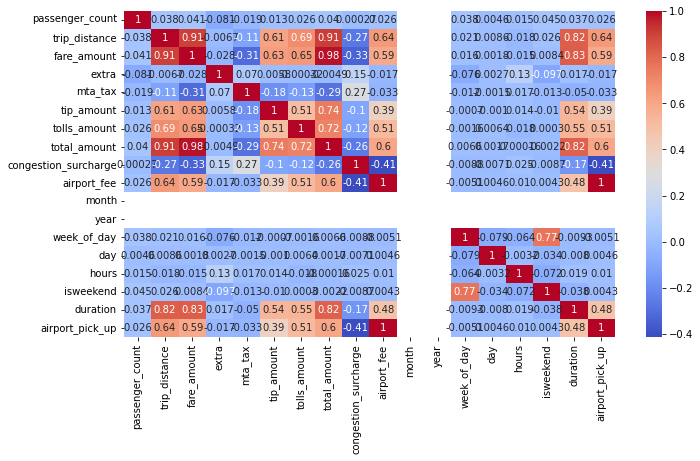

In [121]:
cr=taxi_final.corr()
plt.figure(figsize=(11,6))
sns.heatmap(cr,annot=True,cmap='coolwarm')

In [122]:
taxi_final.drop(columns=['month','year','fare_amount'],inplace=True)

<AxesSubplot:>

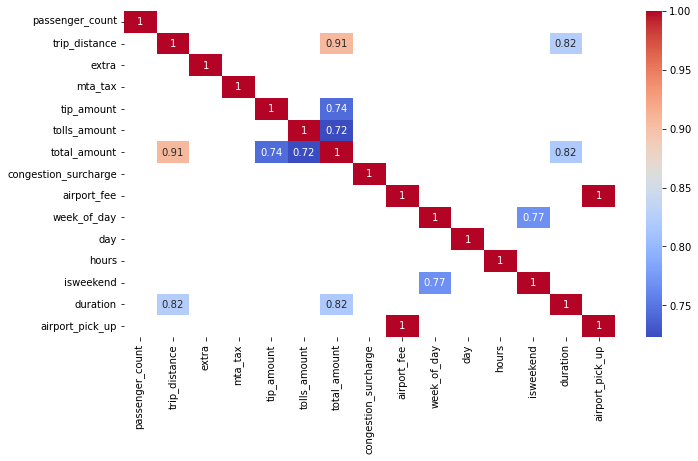

In [123]:
cr=taxi_final.corr()
cr=cr[abs(cr)>.7]
plt.figure(figsize=(11,6))
sns.heatmap(cr,annot=True,cmap='coolwarm')

In [124]:
taxi_final.drop(columns=['airport_fee','week_of_day'],inplace=True)

In [125]:
taxi_final.drop(columns='amount_cat',inplace=True)

### Dummy creation

In [126]:
final=pd.get_dummies(data=taxi_final,drop_first=True)

C:\Users\sony\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [127]:
final.head()

,passenger_count,trip_distance,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,day,hours,...,day_cat_starting_of_month,hours_cat_afternoon,hours_cat_early morning,hours_cat_evening,hours_cat_midNight,hours_cat_morning,time_category_duration_bt_0_30m,time_category_duration_bt_30_60m,time_category_duration_bt_60_120m,time_category_duration_morethan_120
11293,1.0,1.75,0.0,0.5,2.00,0.0,14.80,2.5,1,8,...,1,0,0,0,0,1,0,0,0,0
3241804,1.0,9.16,0.0,0.5,0.00,0.0,39.30,2.5,29,12,...,0,1,0,0,0,0,0,1,0,0
2122208,1.0,5.00,3.0,0.5,2.00,0.0,25.80,2.5,19,1,...,0,0,0,0,1,0,1,0,0,0
645015,1.0,3.02,1.0,0.5,1.78,0.0,19.58,2.5,6,17,...,1,0,0,1,0,0,1,0,0,0
1752107,1.0,3.53,0.5,0.5,2.74,0.0,21.04,2.5,15,22,...,0,0,0,0,0,0,1,0,0,0


#### Model Development

##### Here Model is RandomForestRegressor

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV , train_test_split, RandomizedSearchCV

In [129]:
y=final['total_amount']
x=final.drop(columns=['total_amount','trip_distance'])

In [130]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [131]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [132]:
print('Train_score',rfr.score(x_train,y_train))
print('Test_score',rfr.score(x_test,y_test))

Train_score 0.9953556146867687
Test_score 0.9684641907087745


this is too good to handle therefore we go for gridSearch

In [133]:
pred_train=rfr.predict(x_train)
pred_train

array([81.12  , 12.445 , 45.0304, ..., 14.67  , 14.16  , 24.2074])

In [134]:
pred_test=rfr.predict(x_test)
pred_test

array([13.544 , 79.2896, 12.36  , ..., 77.3759,  9.6493, 16.8161])

In [135]:
# for train data 
print("Train MSE", np.mean((pred_train-y_train)**(2)))
print("Train rmse", np.sqrt(np.mean((pred_train-y_train)**(2))))
print("Train MAE",  np.mean(np.abs(pred_train-y_train)))
print("Train MAPE",  np.mean(np.abs((pred_train-y_train)/y_train)))

Train MSE 1.1844320162497348
Train rmse 1.0883161380084994
Train MAE 0.4221275572043078
Train MAPE 0.018848501445363732


In [136]:
# for test data 
print("Test MSE", np.mean((pred_test-y_test)**(2)))
print("Test rmse", np.sqrt(np.mean((pred_test-y_test)**(2))))
print("Test MAE",  np.mean(np.abs(pred_test-y_test)))
print("Test MAPE",  np.mean(np.abs((pred_test-y_test)/y_test)))

Test MSE 7.960281081658292
Test rmse 2.821397008869594
Test MAE 1.1270880428690546
Test MAPE 0.049920276056730085
